# Introduction to problem statement

### Topic : Employee’s Performance for HR Analytics

### AIM : To predict employee performance based on various factors such as workload, training, and feedback, to inform talent management and development strategies.



### How To Go Forward With The Problem Statement?
* Understand the problem statement and the data.
* Perform some basic data exploration and visualization.
* Preprocess the data and create a model.
* Evaluate the model and make predictions.
* Fine-tune the model and make predictions.
* Summarize the results and conclude.
* Submit the predictions on the given dataset.





### Data Description

In [1]:
# lets import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("../data/Uncleaned_employees_final_dataset (1).csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [6]:
for i in df.columns:
    print(i,df[i].nunique())

employee_id 17414
department 9
region 34
education 3
gender 2
recruitment_channel 3
no_of_trainings 9
age 41
previous_year_rating 5
length_of_service 34
KPIs_met_more_than_80 2
awards_won 2
avg_training_score 61


In [7]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
df["education"].unique()

array(['Bachelors', 'Masters & above', nan, 'Below Secondary'],
      dtype=object)

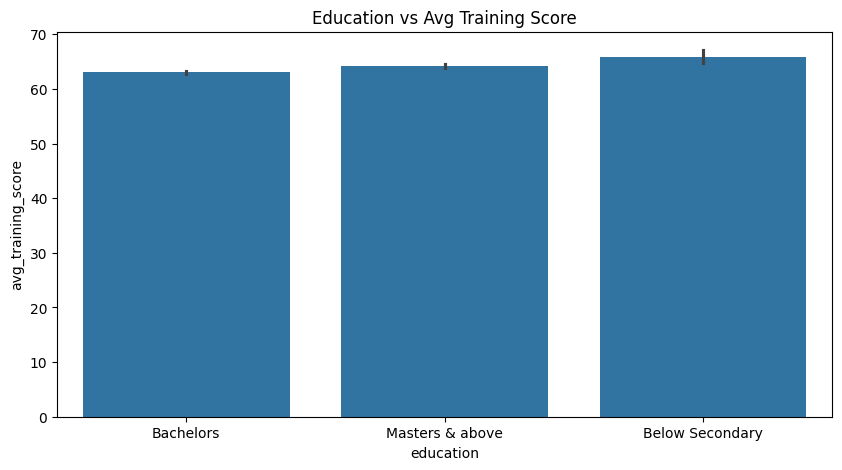

In [9]:
# Lets see the distribution of education vs avg training score

plt.figure(figsize=(10,5))
sns.barplot(x=df["education"], y=df["avg_training_score"])
plt.title("Education vs Avg Training Score")
plt.show()


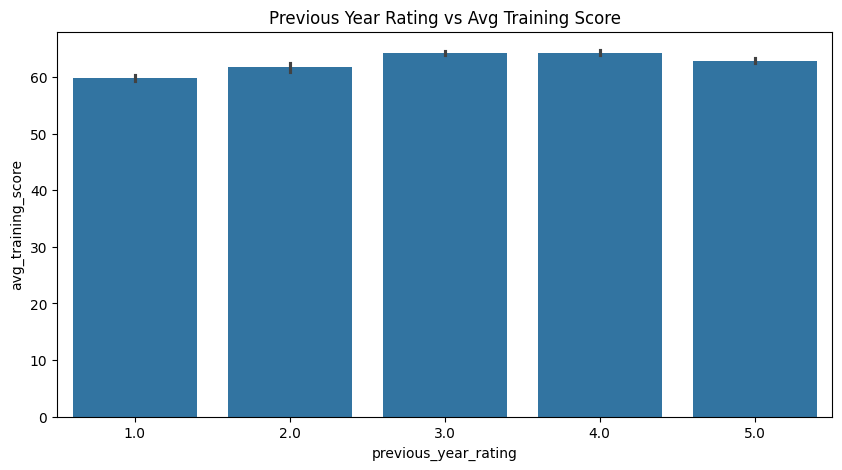

In [10]:
# Lets see the distribution of previous year rating vs avg training score

plt.figure(figsize=(10,5))
sns.barplot(x=df["previous_year_rating"], y=df["avg_training_score"])
plt.title("Previous Year Rating vs Avg Training Score")
plt.show()

/tmp/ipykernel_7258/3051021495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["department"], y=df["avg_training_score"],palette="viridis",data=df)


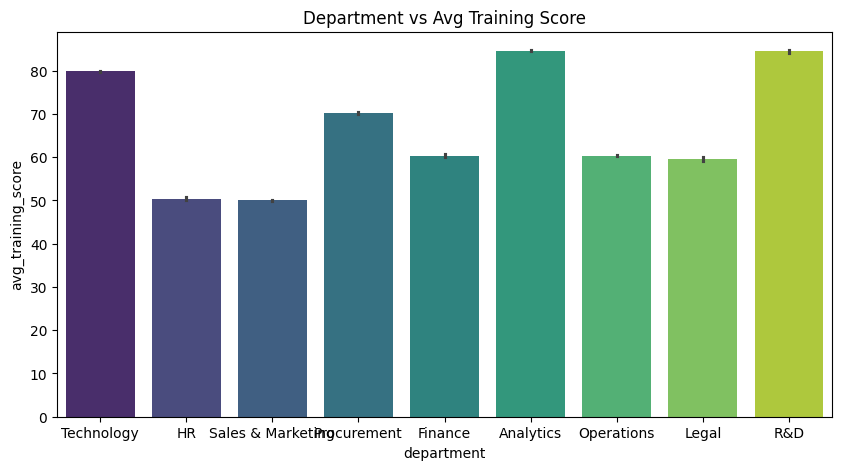

In [11]:
# Lets see the distribution of department vs avg training score

plt.figure(figsize=(10,5))
sns.barplot(x=df["department"], y=df["avg_training_score"],palette="viridis",data=df)
plt.title("Department vs Avg Training Score")
plt.show()



In [12]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

### It contains the following columns:

* Employee ID: The unique ID of the employee.
* Department: The department in which the employee is working.
* Region: The region in which the employee is working.
* Education: The education level of the employee
* Gender: Gender of the employee
* Recruitment Channel: The channel through which the employee was recruited.
* No of trainings: The number of training programs the employee has undergone.
* Age: The age of the employee.
* Previous Year Rating: The performance rating of the employee in the previous year.
* Length of service: The length of service of the employee.
* KPIs_met >80%: Whether the employee has met more than 80% of the KPIs.
* Awards won: Whether the employee has won any awards.


### Target Variable
* Average Training Score: The average score in current training evaluations.


### Lets create  a base model for the given problem statement and then we can improve the model by doing some feature engineering and hyperparameter tuning.

### We Will be using the following libraries for the given problem statement:
* Random Forest
* XGBoost
* Logistic Regression
* Decision Tree
* KNN
* SVM
* Naive Bayes
* More

In [13]:
# there are very less number of na values 

df.isna().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [14]:
# So we can drop the na values
df.dropna(inplace=True)

In [15]:
df.shape

(15424, 13)

In [16]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68


In [17]:
# before that lets conervt the some columns to category
# And lets assign them category codes

for column in df.columns:
    if df[column] is not pd.api.types.is_number:
        df[column] = df[column].astype("category")
        df[column] = df[column].cat.codes
    else:
        pass


In [18]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,14673,2,28,0,0,0,0,11,2,4,0,0,12
2,14231,7,4,0,1,0,0,11,0,3,0,0,8
3,7614,5,11,0,0,0,2,11,1,8,0,0,26
4,12671,1,21,0,1,2,0,10,3,6,0,0,22
5,9038,5,31,0,1,2,0,16,2,1,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,12688,8,31,0,0,1,1,10,4,5,1,0,42
17413,9690,2,31,0,1,0,0,13,0,8,0,0,12
17414,9690,2,31,0,1,0,0,13,0,8,0,0,12
17415,9690,2,31,0,1,0,0,13,0,8,0,0,12


<Axes: >

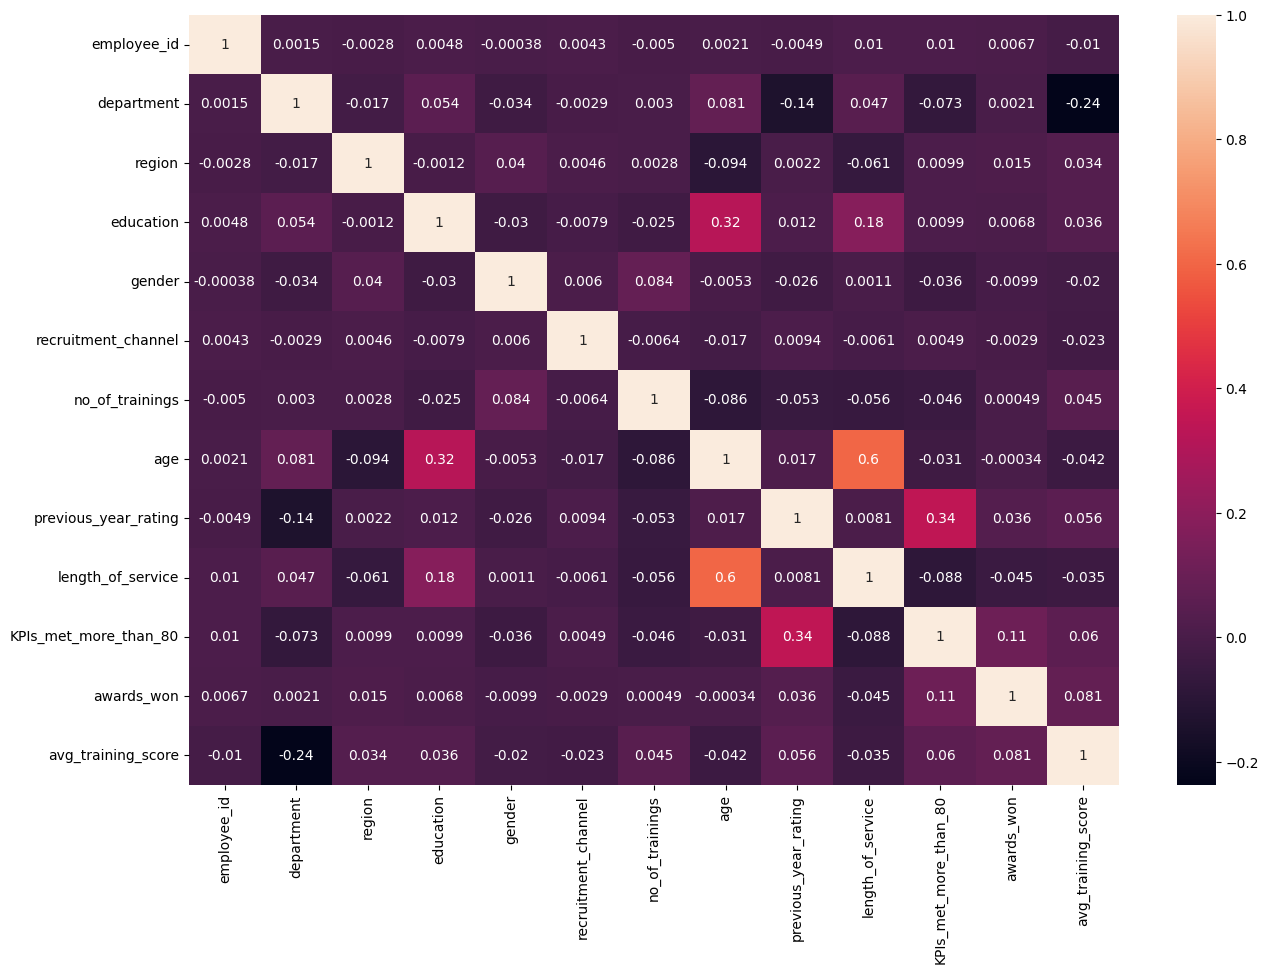

In [19]:
#correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

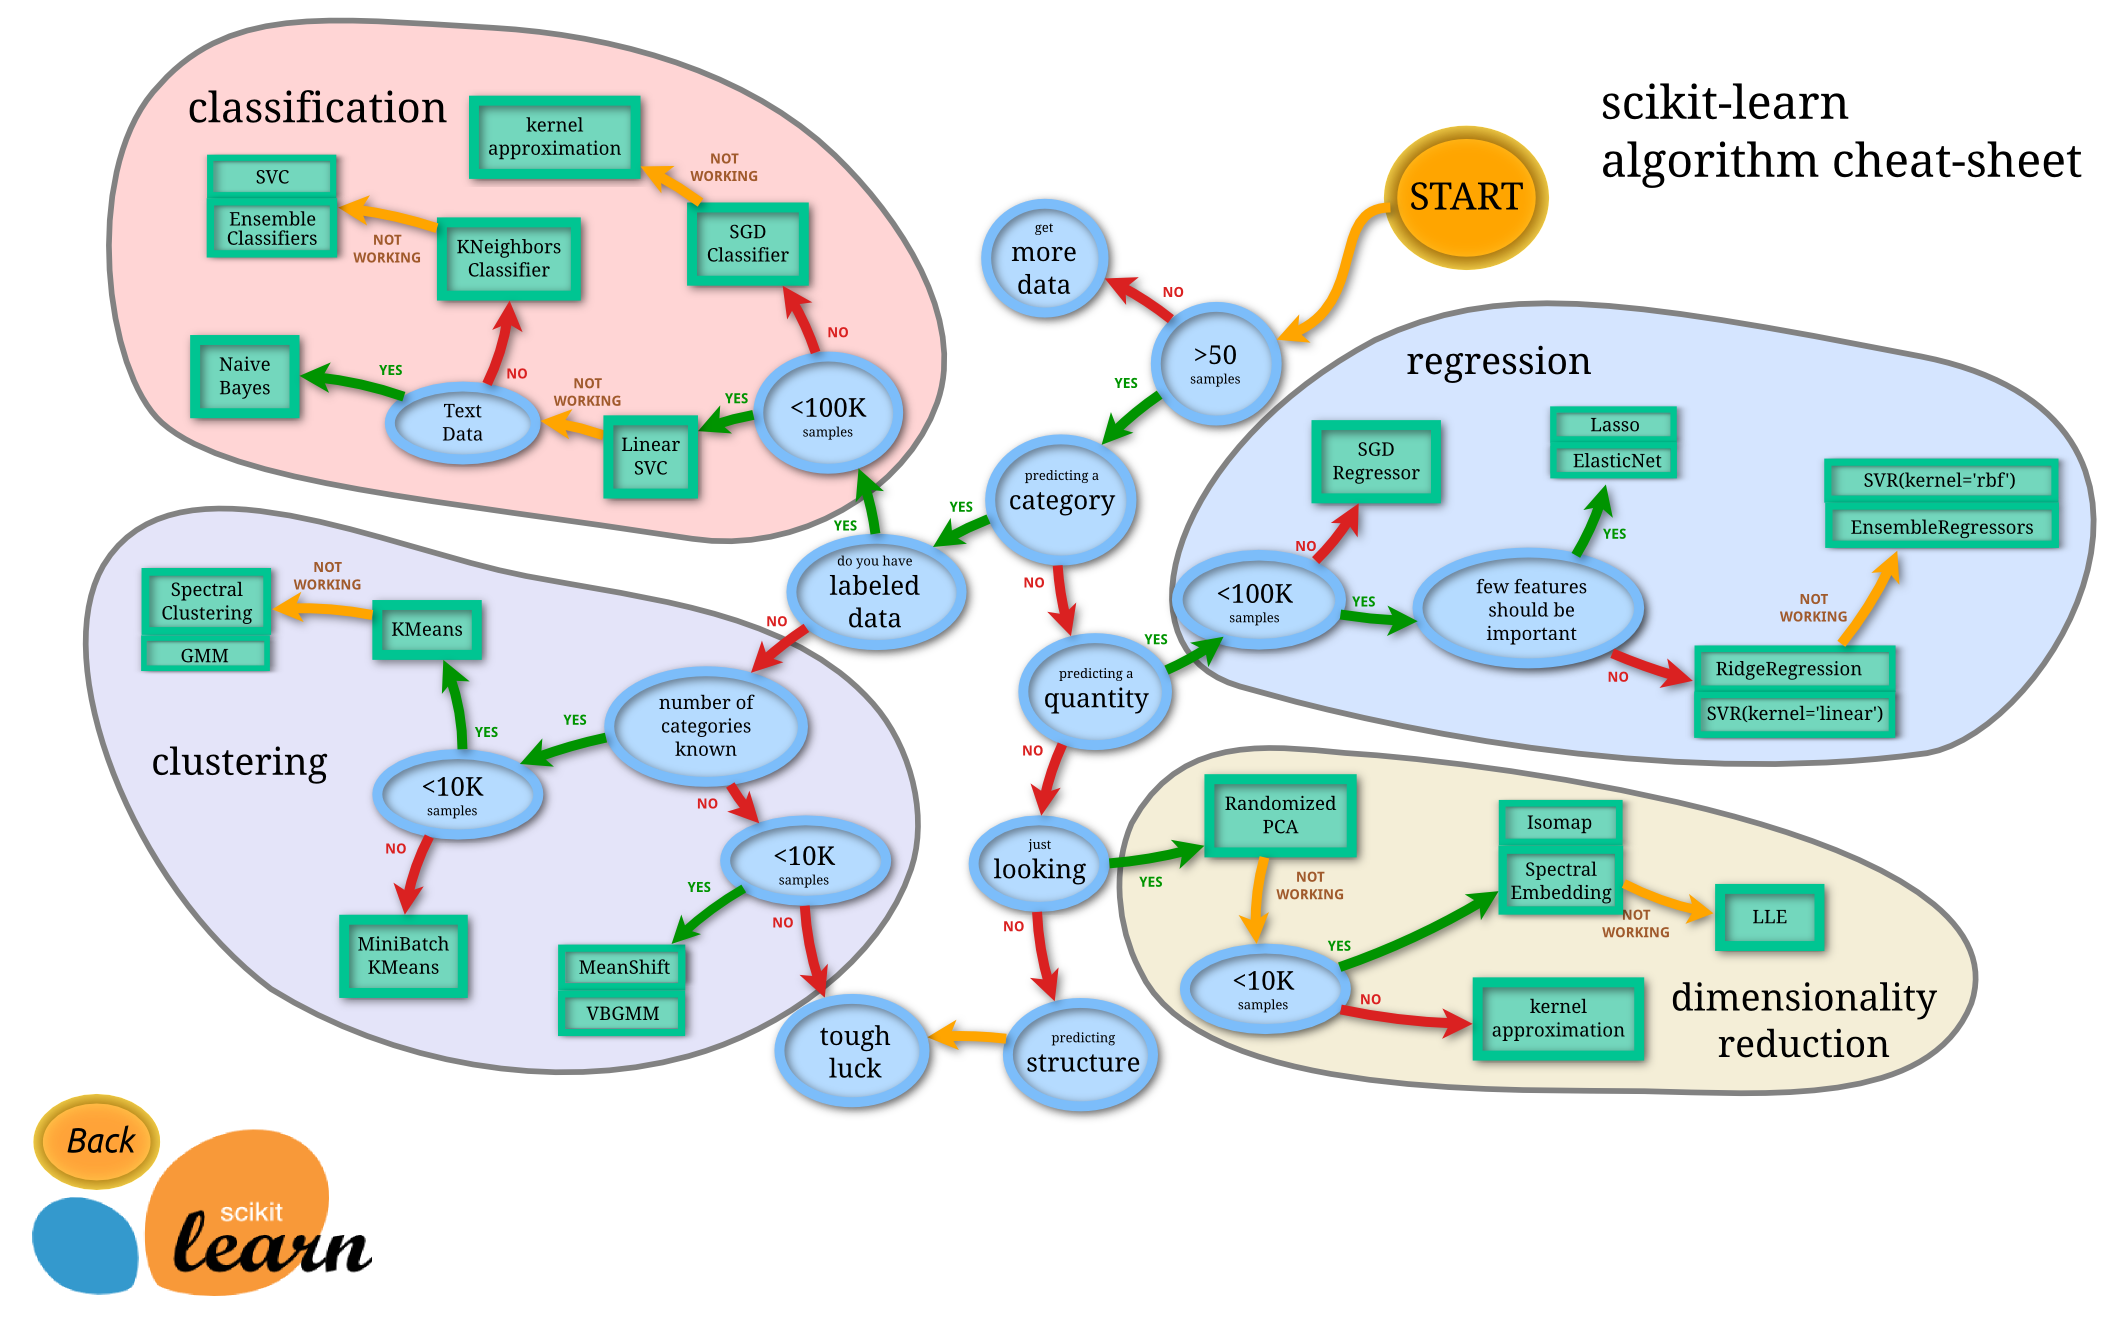"

In [20]:
#as we can see the data is ready for the model building
# lets import out model building libraries
# This is regression problem so we will use regression models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
#XGBoost
import xgboost as xgb





In [21]:
#splitting the data
X = df.drop("avg_training_score",axis=1)
y = df["avg_training_score"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)



In [22]:
models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),xgb.XGBRegressor()]
model_names = ["LinearRegression","RandomForestRegressor","DecisionTreeRegressor","XGBRegressor"]

for i in range(len(models)):
    model = models[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model_names[i])
    print("Mean Squared Error",mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
    print("R2 Score",r2_score(y_test,y_pred))
    print("\n\n")

LinearRegression
Mean Squared Error 162.43333209338385
Mean Absolute Error 11.063655671834088
R2 Score 0.06300478805892629



RandomForestRegressor
Mean Squared Error 22.757538249594813
Mean Absolute Error 2.910589951377634
R2 Score 0.8687233457528467



DecisionTreeRegressor
Mean Squared Error 47.990599675850895
Mean Absolute Error 4.144246353322528
R2 Score 0.7231666583764879



XGBRegressor
Mean Squared Error 23.50469
Mean Absolute Error 2.9498167
R2 Score 0.8644134130734229





<Axes: >

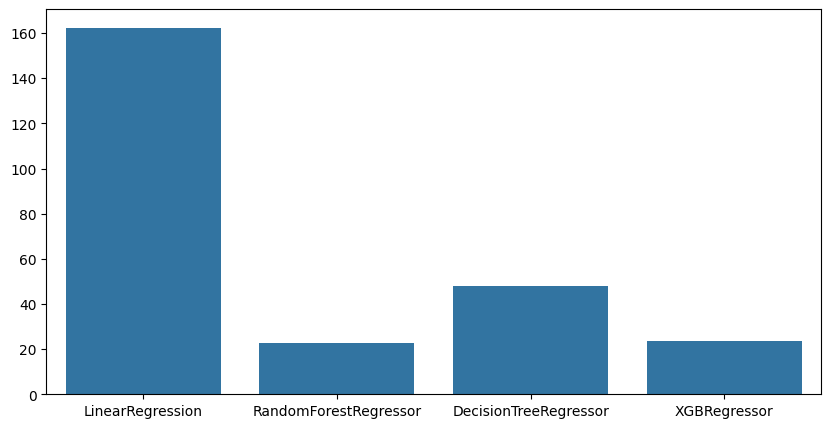

In [23]:
#let plt the results
plt.figure(figsize=(10,5))
sns.barplot(x=model_names,y=[mean_squared_error(y_test,model.predict(X_test)) for model in models])


In [24]:
# lets make our first pridection using Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



In [25]:
#lets evaluate the model prediction
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))



Mean Squared Error 22.818340226904375
Mean Absolute Error 2.8989692058346836
R2 Score 0.86837261009483


In [26]:
# XGBoost
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))



Mean Squared Error 23.50469
Mean Absolute Error 2.9498167
R2 Score 0.8644134130734229


In [27]:
# Decision Tree Regressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))


Mean Squared Error 48.85413290113452
Mean Absolute Error 4.177309562398704
R2 Score 0.7181853747506762


In [28]:
# Linear Regression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))




Mean Squared Error 162.43333209338385
Mean Absolute Error 11.063655671834088
R2 Score 0.06300478805892629


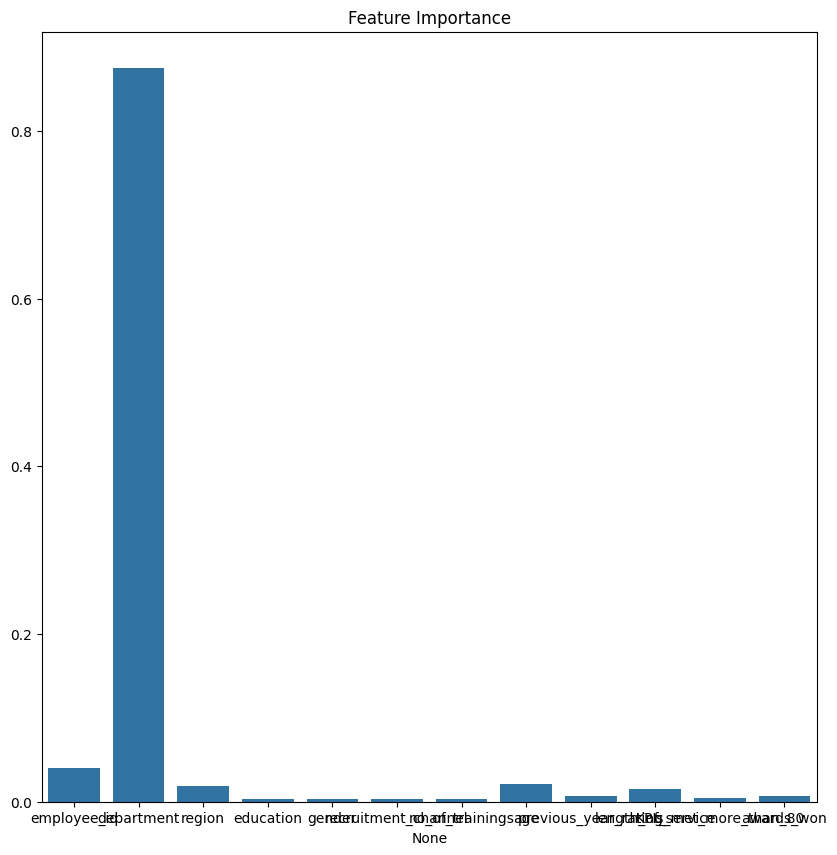

In [29]:
# As we can see the Random Forest Regressor and XGBost is giving the best results
# Lets use Random Forest Regressor for the final prediction

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#feature importance
plt.figure(figsize=(10,10))
sns.barplot(x=X.columns,y=model.feature_importances_)
plt.title("Feature Importance")
plt.show()


In [30]:
# lets tune the hyper parameters for random forest regressor    

from sklearn.model_selection import GridSearchCV


max_depth = np.arange(1,20,5)
min_samples_split = np.arange(250,1000,250)
min_samples_leaf = np.arange(100,400,125)
n_estimators = np.arange(0,1000,250)
max_samples = np.array([0,0.33,0.66,1])
max_features = np.array([0,0.33,0.66,1])
param_grid = {
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "n_estimators":n_estimators,
    "max_samples":max_samples,
    "max_features":max_features
}

In [31]:
# model = RandomForestRegressor()
# grid = GridSearchCV(model,param_grid,verbose=3,cv=5,n_jobs=-1)
# grid.fit(X_train,y_train)
# # 

In [32]:
# grid.best_params_

In [33]:
# grid.best_score_

In [34]:
model = RandomForestRegressor(max_depth=16, max_features=0.33, max_samples=0.33, min_samples_leaf=100, min_samples_split=500, n_estimators=250)

In [35]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=16, max_features=0.33, max_samples=0.33,
                      min_samples_leaf=100, min_samples_split=500,
                      n_estimators=250)

In [36]:
#lets evaluate 
model.score(X_test,y_test)

0.4663053458713651

In [37]:
# #lets cheack n_estimators
# n_estimators = np.arange(0,1000,50)
# param_grid = {
#     "n_estimators":n_estimators
# }
# grid = GridSearchCV(model,param_grid,verbose=3,cv=5,n_jobs=-1)

In [38]:
# grid.fit(X_train,y_train)

In [39]:
# grid.best_params_

In [40]:
# grid.best_score_

In [41]:
# y_pred = grid.predict(X_test)


In [42]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model Score",model.score(X_test,y_test))


Mean Squared Error 22.899686256077796
Mean Absolute Error 2.917889789303079
R2 Score 0.8679033662588291
Model Score 0.4663053458713651


In [43]:
model = RandomForestRegressor()

In [44]:
model.fit(X_train,y_train)


RandomForestRegressor()

In [45]:
y_pred=model.predict(X_test)

In [46]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))

Mean Squared Error 22.88640291734198
Mean Absolute Error 2.9034359805510537
R2 Score 0.8679799910785853


In [47]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [48]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune   
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1, error_score="raise")

In [49]:
# Fit the random search model

# rf_random.fit(X_train, y_train)

In [50]:
# rf_random.best_params_


In [51]:
# rf_random.score(X_test,y_test)

In [52]:
# y_pred=rf_random.predict(X_test)

In [53]:
# print("Mean Squared Error",mean_squared_error(y_test,y_pred))
# print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
# print("R2 Score",r2_score(y_test,y_pred))
# print("Model Score",rf_random.score(X_test,y_test))

In [54]:
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.8679799910785853

In [55]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model Score",model.score(X_test,y_test))

Mean Squared Error 22.88640291734198
Mean Absolute Error 2.9034359805510537
R2 Score 0.8679799910785853
Model Score 0.8679799910785853


In [56]:
model = RandomForestRegressor(n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_depth=10, bootstrap=True)

In [57]:
# {'n_estimators': 400,
#  'min_samples_split': 10,
#  'min_samples_leaf': 1,
#  'max_depth': 10,
#  'bootstrap': True}
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=400)

In [58]:
y_pred = model.predict(X_test)

In [59]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model Score",model.score(X_test,y_test))


Mean Squared Error 21.833383033527756
Mean Absolute Error 2.763973896307753
R2 Score 0.8740543267860215
Model Score 0.8740543267860215


In [60]:
#saving the model
# import joblib
# joblib.dump(model,"../models/RandomForestRegressor.pkl")


In [61]:

model = xgb.XGBRegressor(n_estimators=450, max_depth=6, learning_rate=0.1, booster="gbtree")
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=450, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
model.score(X_test,y_test)

0.8647371491783125

In [63]:
y_pred=model.predict(X_test)

In [64]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model Score",model.score(X_test,y_test))


Mean Squared Error 23.448566
Mean Absolute Error 2.958111
R2 Score 0.8647371491783125
Model Score 0.8647371491783125


In [65]:
model=xgb.XGBRegressor(n_estimators=100, max_depth=2, learning_rate=0.23, booster="gbtree",subsample=1,colsample_bytree=1) 
# {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.25, 'booster' :'gbtree'} rmse around 20
# n_estimators=100, max_depth=4, learning_rate=0.23, booster="gbtree",subsample=1,colsample_bytree=1 
# Mean Squared Error 22.23004
# Mean Absolute Error 2.8318412
# R2 Score 0.8717662212808598
# Model Score 0.8717662212808598


model.fit(X_train,y_train)



XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.23, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [66]:
model.score(X_test,y_test)

0.8788971404099483

In [67]:
y_pred=model.predict(X_test)

In [68]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model Score",model.score(X_test,y_test))


Mean Squared Error 20.993855
Mean Absolute Error 2.742879
R2 Score 0.8788971404099483
Model Score 0.8788971404099483


In [69]:
#lets push this score to above 90
# lets tune the hyper parameters for xgboost
# as we know our best para 


In [70]:
model.score(X_test,y_test)

0.8788971404099483

In [71]:
# #lets save above model 
# import joblib
# joblib.dump(model,"../models/XGBoostRegressor.pkl")




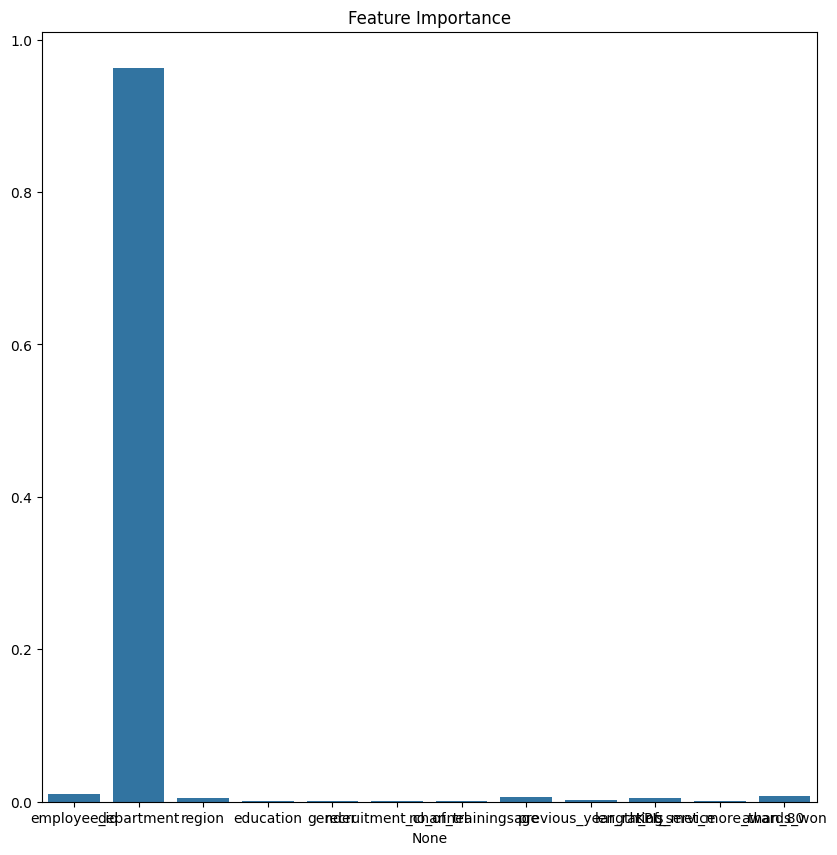

In [73]:
#lets see feature importance of both models
# Random Forest Regressor
import joblib

model = joblib.load("../models/RandomForestRegressor.pkl")

plt.figure(figsize=(10,10))
sns.barplot(x=X.columns,y=model.feature_importances_)
plt.title("Feature Importance")
plt.show()



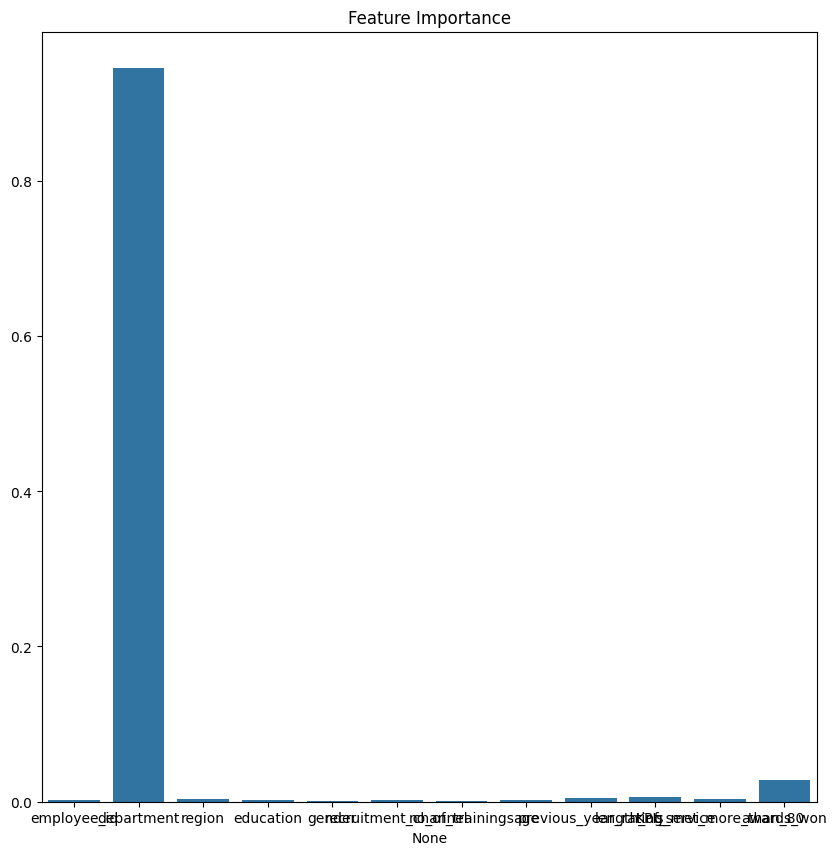

In [74]:
# XGBoost Regressor
xgb_model = joblib.load("../models/XGBoostRegressor.pkl")

plt.figure(figsize=(10,10))
sns.barplot(x=X.columns,y=xgb_model.feature_importances_)
plt.title("Feature Importance")
plt.show()



In [75]:
#lets us ensemble learning on both models
# lets take average of both models
from sklearn.ensemble import VotingRegressor
en_model = VotingRegressor([("RandomForestRegressor",joblib.load("../models/RandomForestRegressor.pkl")),("XGBoostRegressor",joblib.load("../models/XGBoostRegressor.pkl"))])

model.fit(X_train,y_train)
model.score(X_test,y_test)


0.8740782667859953

In [76]:
#lets put the best param of both the model in en model
en_model = VotingRegressor([("RandomForestRegressor",RandomForestRegressor(n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_depth=10, bootstrap=True)),("XGBoostRegressor",xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.23, booster="gbtree",subsample=1,colsample_bytree=1))],weights=[1,1],verbose=True)

In [77]:
en_model.fit(X_train,y_train)


[Voting] .... (1 of 2) Processing RandomForestRegressor, total=   8.8s
[Voting] ......... (2 of 2) Processing XGBoostRegressor, total=   0.1s


VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(max_depth=10,
                                                   min_samples_split=10,
                                                   n_estimators=400)),
                            ('XGBoostRegressor',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=N...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.23, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))],
                verbose=True, weights=[1, 1])

In [78]:
en_model.score(X_test,y_test)

0.876147257097124

In [79]:
y_pred= en_model.predict(X_test)

In [80]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model Score",en_model.score(X_test,y_test))


Mean Squared Error 21.470561922022405
Mean Absolute Error 2.7582524111292734
R2 Score 0.876147257097124
Model Score 0.876147257097124


In [81]:
#now lets make some change to data as we have seen that the data is not normalised
# lets normalise the data
#and lets remove employee id as it is not important
X = df.drop("avg_training_score",axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)




In [82]:
# Random Forest Regressor
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.8741675535697959

In [83]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.23, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [84]:
xgb_model.score(X_test,y_test)

0.8788971404099483

In [85]:
y_pred = model.predict(X_test)

In [86]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model Score",model.score(X_test,y_test))


Mean Squared Error 21.81375454072831
Mean Absolute Error 2.76449977520966
R2 Score 0.8741675535697959
Model Score 0.8741675535697959


In [87]:
y_preds=xgb_model.predict(X_test)

In [88]:
print("Mean Squared Error",mean_squared_error(y_test,y_preds))
print("Mean Absolute Error",mean_absolute_error(y_test,y_preds))
print("R2 Score",r2_score(y_test,y_preds))
print("Model Score",xgb_model.score(X_test,y_test))

Mean Squared Error 20.993855
Mean Absolute Error 2.742879
R2 Score 0.8788971404099483
Model Score 0.8788971404099483


In [89]:
en_model.fit(X_train,y_train)

[Voting] .... (1 of 2) Processing RandomForestRegressor, total=   8.9s
[Voting] ......... (2 of 2) Processing XGBoostRegressor, total=   0.1s


VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(max_depth=10,
                                                   min_samples_split=10,
                                                   n_estimators=400)),
                            ('XGBoostRegressor',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=N...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.23, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))],
                verbose=True, weights=[1, 1])

In [90]:
en_model.score(X_test,y_test)

0.8760317422400783

In [91]:
# #lets save the above saved model
# joblib.dump(model,"../models/RandomForestRegressorV2.pkl")
# joblib.dump(xgb_model,"../models/XGBoostRegressorV2.pkl")
# joblib.dump(en_model,"../models/EnsembleModel.pkl")

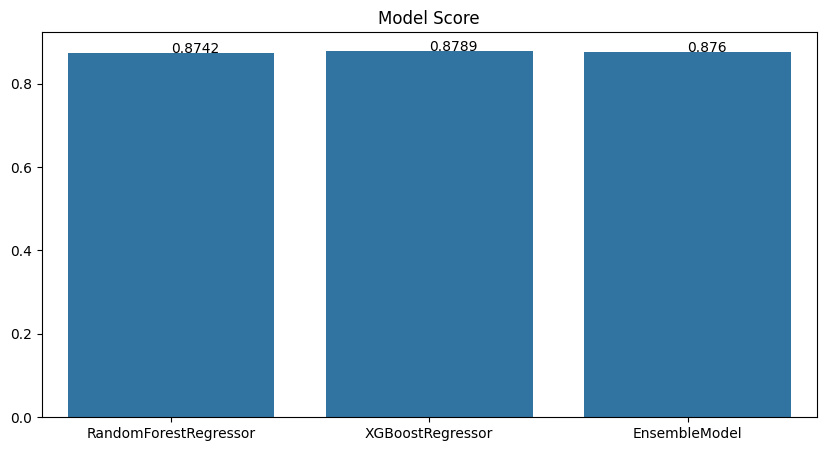

In [92]:
#now lets plot the score of our models
plt.figure(figsize=(10,5))
sns.barplot(x=["RandomForestRegressor","XGBoostRegressor","EnsembleModel"],y=[model.score(X_test,y_test),xgb_model.score(X_test,y_test),en_model.score(X_test,y_test)])
plt.title("Model Score")
for i in range(3):
    plt.text(i,[model.score(X_test,y_test),xgb_model.score(X_test,y_test),en_model.score(X_test,y_test)][i],round([model.score(X_test,y_test),xgb_model.score(X_test,y_test),en_model.score(X_test,y_test)][i],4))

plt.show()


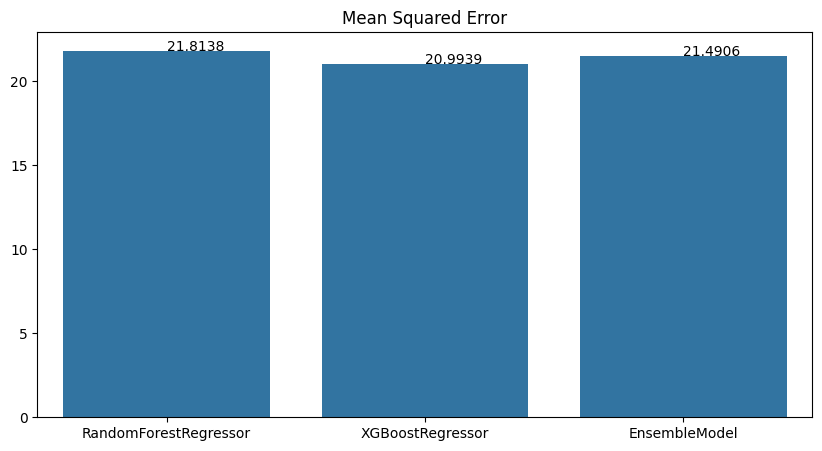

In [93]:
#now lets plot Mean Squared Error
plt.figure(figsize=(10,5))
sns.barplot(x=["RandomForestRegressor","XGBoostRegressor","EnsembleModel"],y=[mean_squared_error(y_test,y_pred),mean_squared_error(y_test,y_preds),mean_squared_error(y_test,en_model.predict(X_test))])
plt.title("Mean Squared Error")
for i in range(3):
    plt.text(i,[mean_squared_error(y_test,y_pred),mean_squared_error(y_test,y_preds),mean_squared_error(y_test,en_model.predict(X_test))][i],round([mean_squared_error(y_test,y_pred),mean_squared_error(y_test,y_preds),mean_squared_error(y_test,en_model.predict(X_test))][i],4))
plt.show()

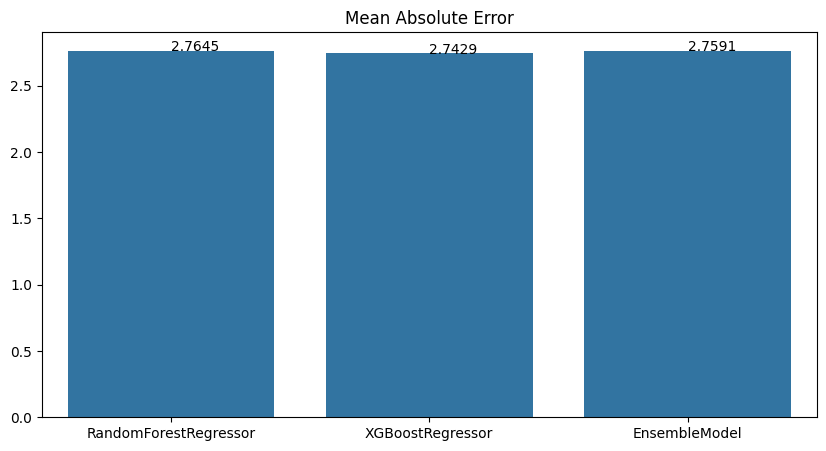

In [94]:
#now lets plot Mean Absolute Error
plt.figure(figsize=(10,5))
sns.barplot(x=["RandomForestRegressor","XGBoostRegressor","EnsembleModel"],y=[mean_absolute_error(y_test,y_pred),mean_absolute_error(y_test,y_preds),mean_absolute_error(y_test,en_model.predict(X_test))])
plt.title("Mean Absolute Error")
for i in range(3):
    plt.text(i,[mean_absolute_error(y_test,y_pred),mean_absolute_error(y_test,y_preds),mean_absolute_error(y_test,en_model.predict(X_test))][i],round([mean_absolute_error(y_test,y_pred),mean_absolute_error(y_test,y_preds),mean_absolute_error(y_test,en_model.predict(X_test))][i],4))
plt.show()

In [95]:
y_preds = en_model.predict(X_test)

In [96]:
evolution_matrix = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_preds, columns=["Predicted_Avg_Training_Score"])], axis=1)


In [97]:
#lets covert the pridected values to int
evolution_matrix["Predicted_Avg_Training_Score"] = evolution_matrix["Predicted_Avg_Training_Score"].astype(int)

In [98]:
evolution_matrix

,avg_training_score,Predicted_Avg_Training_Score
0,17,20
1,11,10
2,33,30
3,21,21
4,12,10
...,...,...
3080,36,30
3081,47,45
3082,31,30
3083,7,11


In [99]:
# Now from here we will try to build an API for the model

In [100]:
#let train the model

df=pd.read_csv("../data/Uncleaned_employees_final_dataset (1).csv")
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [159]:
#let make the data machine learning ready using scaler
#first lets convert string to number using sklearn label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])
    else:
        pass

X = df.drop("avg_training_score",axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df["avg_training_score"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)


In [160]:
en_model.fit(X_train,y_train)

[Voting] .... (1 of 2) Processing RandomForestRegressor, total=  10.3s
[Voting] ......... (2 of 2) Processing XGBoostRegressor, total=   0.1s


VotingRegressor(estimators=[('RandomForestRegressor',
                             RandomForestRegressor(max_depth=10,
                                                   min_samples_split=10,
                                                   n_estimators=400)),
                            ('XGBoostRegressor',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=N...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.23, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))],
                verbose=True, weights=[1, 1])

In [161]:
en_model.score(X_test,y_test)

0.8897092872656751

In [162]:
y_pred=en_model.predict(X_test)


In [163]:
y_pred = y_pred.astype(int)

In [164]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model Score",en_model.score(X_test,y_test))


Mean Squared Error 20.065442020665902
Mean Absolute Error 2.7072330654420207
R2 Score 0.8882714679368169
Model Score 0.8897092872656751


In [165]:
xgb_model=joblib.load("../models/XGBoostRegressorV2.pkl")

In [166]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.23, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [167]:
xgb_model.score(X_test,y_test)

0.8911801065978657

In [168]:
model=joblib.load("../models/RandomForestRegressorV2.pkl")

In [169]:
model=RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=400)


In [132]:
model.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=400)

In [133]:
model.score(X_test,y_test)

0.9999987046151834

In [135]:
y_pred=model.predict(X_test).astype(int)

In [178]:
#traning the scaler transformer
scaler = StandardScaler()
scaler.fit(df.drop("avg_training_score",axis=1))


StandardScaler()

In [180]:
# Lets make a function to encode data 
def encode_data(data):
    for column in data.columns:
        if data[column].dtype == "object":
            data[column] = le.fit_transform(data[column])
        else:
            pass
    return data

In [182]:
da=temp_df.head(1).drop("avg_training_score",axis=1).to_numpy()


In [184]:
en_dat=encode_data(temp_df.head(1).drop("avg_training_score",axis=1))

In [187]:
sca_data=scaler.transform(en_dat)

In [188]:
en_model.predict(sca_data)

array([83.85818978])

In [189]:
temp_df.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51


In [190]:
#lets save the scaler
joblib.dump(scaler,"../models/scaler.pkl")

['../models/scaler.pkl']

In [191]:
#lets pack it

#encode data
def encode_data(data):
    """
    This function will encode the data
    """
    for column in data.columns:
        if data[column].dtype == "object":
            data[column] = le.fit_transform(data[column])
        else:
            pass
    return data

In [192]:
#scaler function
def scaler(data):
    """
    This function will scale the data
    """
    scaler = joblib.load("../models/scaler.pkl")
    data=scaler.fit(data)
    return data

In [193]:
#predict function
def predict(data):
    """
    This function will predict the data
    """
    en_model = joblib.load("../models/EnsembleModel.pkl")
    scaler = joblib.load("../models/scaler.pkl")
    data = encode_data(data)
    data = scaler.transform(data)
    pridiction = en_model.predict(data).astype(int)
    return pridiction

In [197]:
#lets make pridiction on third row of temp_df
temp_df=pd.read_csv("../data/Uncleaned_employees_final_dataset (1).csv")

predict(temp_df.iloc[2:3].drop("avg_training_score",axis=1))

array([45])

In [198]:
temp_df.iloc[2:3]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
